# Data Wrangling

Data wrangling, also known as Data Manipulation, is mostly a three part process performed both in linear order or non-linear(refers ) order to convert the data into a format which is useful for the analysis or modelling. The three parts are:

1. Data Cleaning
2. Data Transformation
3. Data Enrichment

In [1]:
!git clone https://github.com/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git

%cd Data-Analytics-Learning-and-Projects

Cloning into 'Data-Analytics-Learning-and-Projects'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 68 (delta 9), reused 31 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 1016.72 KiB | 3.66 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/Data-Analytics-Learning-and-Projects


### Data Transformation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls -lh /content/Data-Analytics-Learning-and-Projects/Chapter-3/Data

total 168K
-rw-r--r-- 1 root root  47K Mar 12 05:30 bitcoin.csv
-rw-r--r-- 1 root root  46K Mar 12 05:30 dirty_data.csv
-rw-r--r-- 1 root root 5.4K Mar 12 05:30 long_data.csv
-rw-r--r-- 1 root root 5.3K Mar 12 05:30 nyc_temperatures.csv
-rw-r--r-- 1 root root  52K Mar 12 05:30 sp500.csv
-rw-r--r-- 1 root root  794 Mar 12 05:30 wide_data.csv


In [4]:
!head -n 2 /content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/wide_data.csv

date,TMAX,TMIN,TOBS
2018-10-01,21.1,8.9,13.9


In [5]:
!head -n 2 /content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/long_data.csv

attributes,datatype,date,station,value
",,H,0700",TMAX,2018-10-01T00:00:00,GHCND:USC00280907,21.1


In [6]:
wide_df = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/wide_data.csv',
                      parse_dates = True)
long_df = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-3/Data/long_data.csv',
                      usecols = ['date', 'datatype', 'value'],
                      parse_dates = True)[['date', 'datatype', 'value']] # to restructure the columns' order

In [7]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [8]:
wide_df.describe(include = 'all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
unique,31,NaN,NaN,NaN
top,2018-10-01,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,16.829032,7.561290,10.022581
std,NaN,5.714962,6.513252,6.596550
min,NaN,7.800000,-1.100000,-1.100000
25%,NaN,12.750000,2.500000,5.550000
50%,NaN,16.100000,6.700000,8.300000
75%,NaN,21.950000,13.600000,16.100000


<Axes: title={'center': 'Temperature in NYC in Ocotober 2018'}, xlabel='Date', ylabel='Temperature in Celsius'>

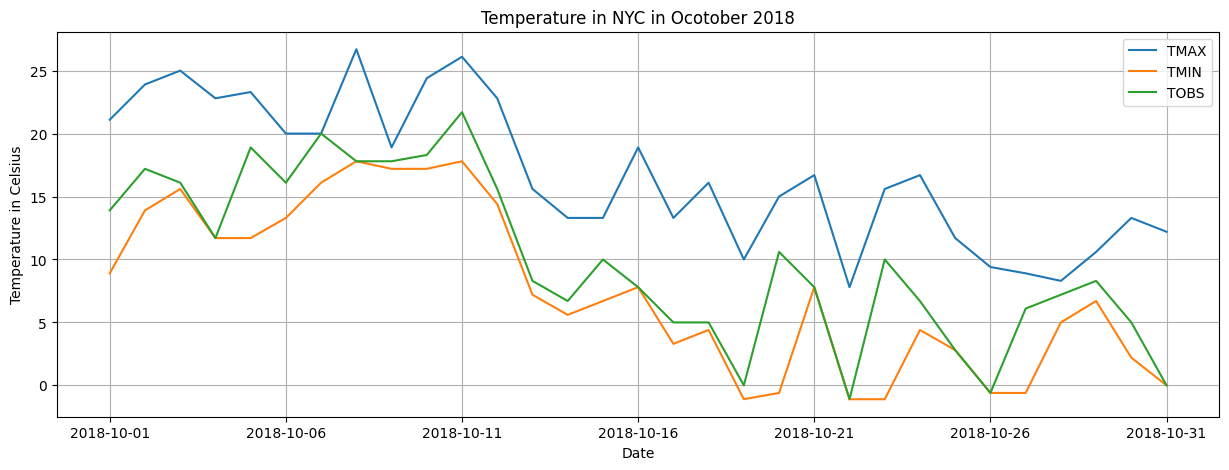

In [9]:
wide_df.plot(
    kind = 'line',
    y=['TMAX', 'TMIN', 'TOBS'],
    x = 'date',
    title = 'Temperature in NYC in Ocotober 2018',
    figsize = (15, 5),
    xlabel = 'Date',
    ylabel = 'Temperature in Celsius',
    grid = True,
    legend = True
)

In [10]:
long_df.head(6)

,date,datatype,value
0,2018-10-01T00:00:00,TMAX,21.1
1,2018-10-01T00:00:00,TMIN,8.9
2,2018-10-01T00:00:00,TOBS,13.9
3,2018-10-02T00:00:00,TMAX,23.9
4,2018-10-02T00:00:00,TMIN,13.9
5,2018-10-02T00:00:00,TOBS,17.2


In [11]:
long_df.describe(include='all')

,date,datatype,value
count,93,93,93.000000
unique,31,3,NaN
top,2018-10-01T00:00:00,TMAX,NaN
freq,3,31,NaN
mean,NaN,NaN,11.470968
std,NaN,NaN,7.362354
min,NaN,NaN,-1.100000
25%,NaN,NaN,6.700000
50%,NaN,NaN,11.700000
75%,NaN,NaN,17.200000


***Note:*** Pandas expects its data for plotting to be in the wide format, so, in order to easily make the same plot that we did with the wide format data, we must use another plotting library, called seaborn.

In [12]:
import seaborn as sns

In [13]:
sns.set(rc={'figure.figsize':(15,5)},
        style = 'white')

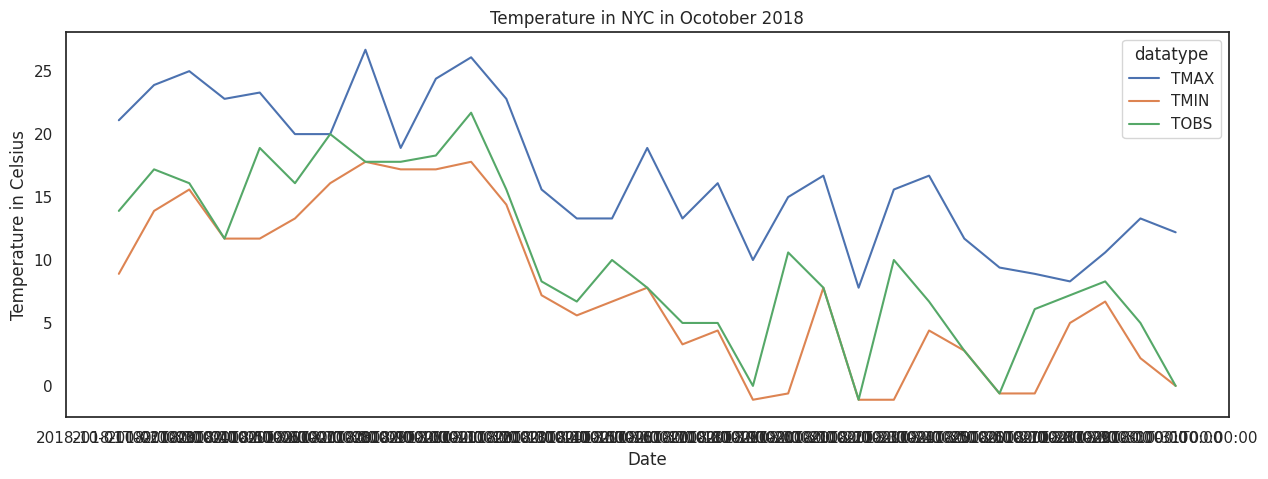

In [14]:
ax = sns.lineplot(
    data = long_df,
    hue = 'datatype',
    y = 'value',
    x = 'date',
)

ax.set_ylabel('Temperature in Celsius')
ax.set_xlabel('Date')
ax.set_title('Temperature in NYC in Ocotober 2018')
plt.show()

In [17]:
# dir(ax)

In [18]:
# ax.hlines?

### Data Enrichment

Data enrichement is the process of enhancing the raw data by supplementing it with additional, relevant information from either external soruces or internal sources.

Following are the ways to enhance data using original data:

1. **Adding new columns:** Creating new, relevant columns from the already existing columns and appending them to the original dataframe.
2. **Binning:** Turning the continuous or discrete data with many disitinct values into range buckets, which makes the column discrete while letting us control the number of possible values in the columns.
3. **Aggregating:** Rolling up the data and summarizing it.
4. **Resampling:** Changing the frequncy of observations, mainly of timeseries data, by either upsampling or downsampling.

    Types of Resampling:

    - Downsampling – Reducing the frequency of data (e.g., converting daily data to monthly data).
    - Upsampling – Increasing the frequency of data (e.g., filling in missing hourly data from daily data).
    - Interpolation – Estimating values in between existing data points.

In [20]:
import os
os.environ["FAKE_VAR"] = 'FAKE_VAR'